In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('../data/csv/Tipo di località e paese di residenza (IT1,122_54_DF_DCSC_TUR_10,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_10(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='TIME_PERIOD'>

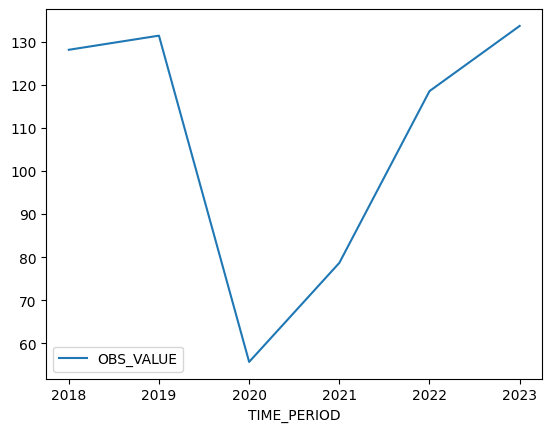

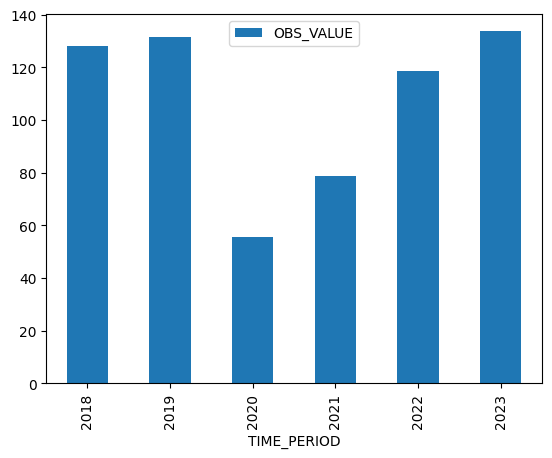

In [63]:
arrivals_per_year = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_year[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
arrivals.plot()
arrivals.plot.bar()

## ARRIVALS PER YEAR

In [64]:
pre = arrivals[arrivals.index <= 2019]
curr = arrivals[(arrivals.index >= 2020) & (arrivals.index <= 2021)]
post = arrivals[arrivals.index >= 2022]

Text(0.5, 1.0, 'arrivals per year')

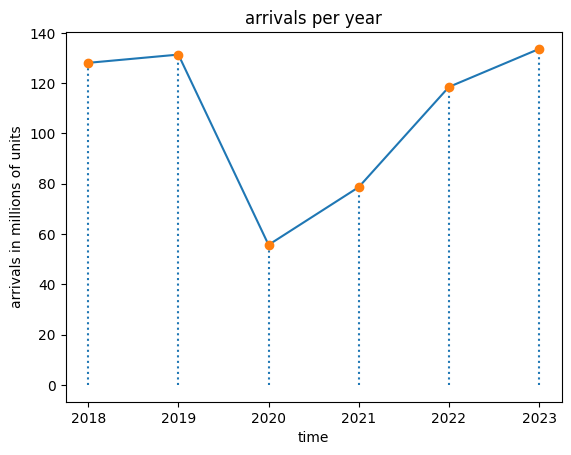

In [89]:
plt.vlines(arrivals.index, 0, arrivals['OBS_VALUE'], linestyles='dotted')
plt.plot(arrivals.index, arrivals['OBS_VALUE'])
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")

Text(0.5, 1.0, 'arrivals per year')

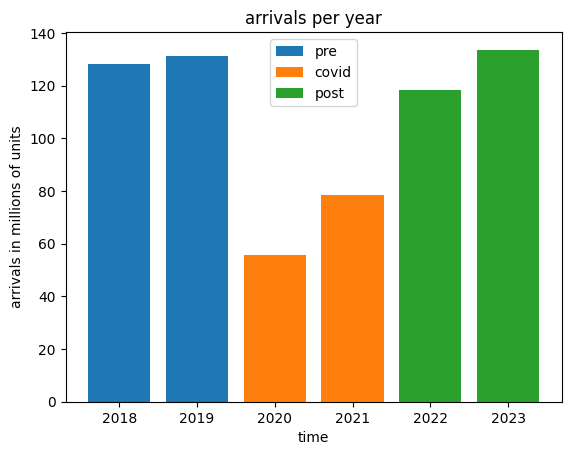

In [88]:
plt.bar(pre.index, pre['OBS_VALUE'], label="pre")
plt.bar(curr.index, curr['OBS_VALUE'], label="covid")
plt.bar(post.index, post['OBS_VALUE'], label="post")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per year")

## ARRIVALS PER COUNTRY

In [67]:
arrivals_per_country = df[(df['COUNTRY_RES_GUESTS'] != 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_it = arrivals_per_country[arrivals_per_country['COUNTRY_RES_GUESTS'] == 'IT'].set_index('TIME_PERIOD')
arrivals_extra_it = arrivals_per_country[arrivals_per_country['COUNTRY_RES_GUESTS'] != 'IT'].set_index('TIME_PERIOD')

Text(0.5, 1.0, 'arrivals per country')

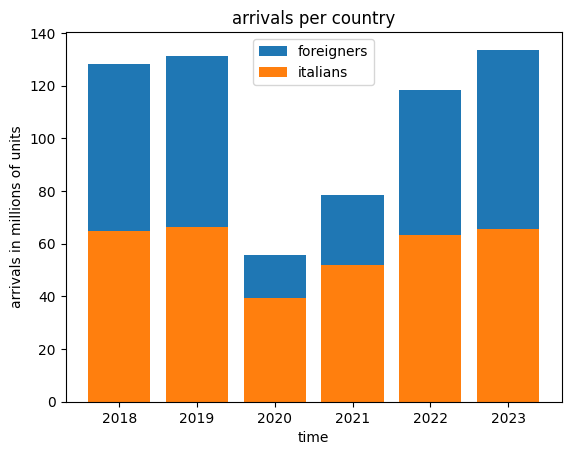

In [90]:
plt.bar(arrivals_extra_it.index, arrivals_extra_it['OBS_VALUE'] + arrivals_it['OBS_VALUE'], label="foreigners")
plt.bar(arrivals_it.index, arrivals_it['OBS_VALUE'], label="italians")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per country")

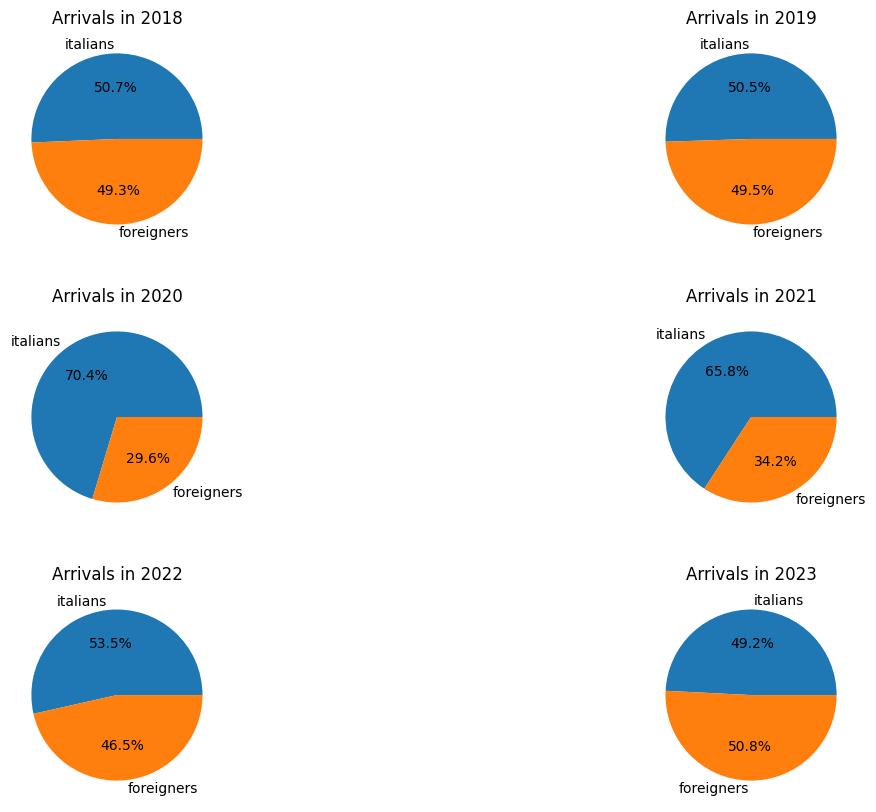

In [112]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  it_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  ax.pie([it_value, other_value], labels=['italians', 'foreigners'], autopct='%1.1f%%')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

## ARRIVALS PER ACCOMODATION

In [104]:
arrivals_per_accommodation = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] != 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] == 'HOTELLIKE'].set_index('TIME_PERIOD')
arrivals_extra_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] != 'HOTELLIKE'].set_index('TIME_PERIOD')

Text(0.5, 1.0, 'arrivals per accommodation')

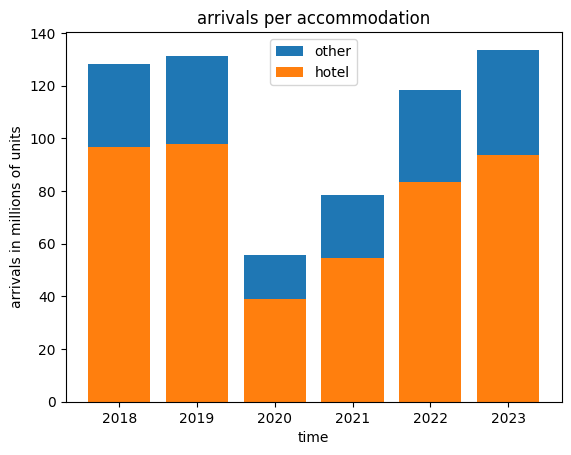

In [107]:
plt.bar(arrivals_extra_hotel.index, arrivals_extra_hotel['OBS_VALUE'] + arrivals_hotel['OBS_VALUE'], label="other")
plt.bar(arrivals_hotel.index, arrivals_hotel['OBS_VALUE'], label="hotel")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per accommodation")

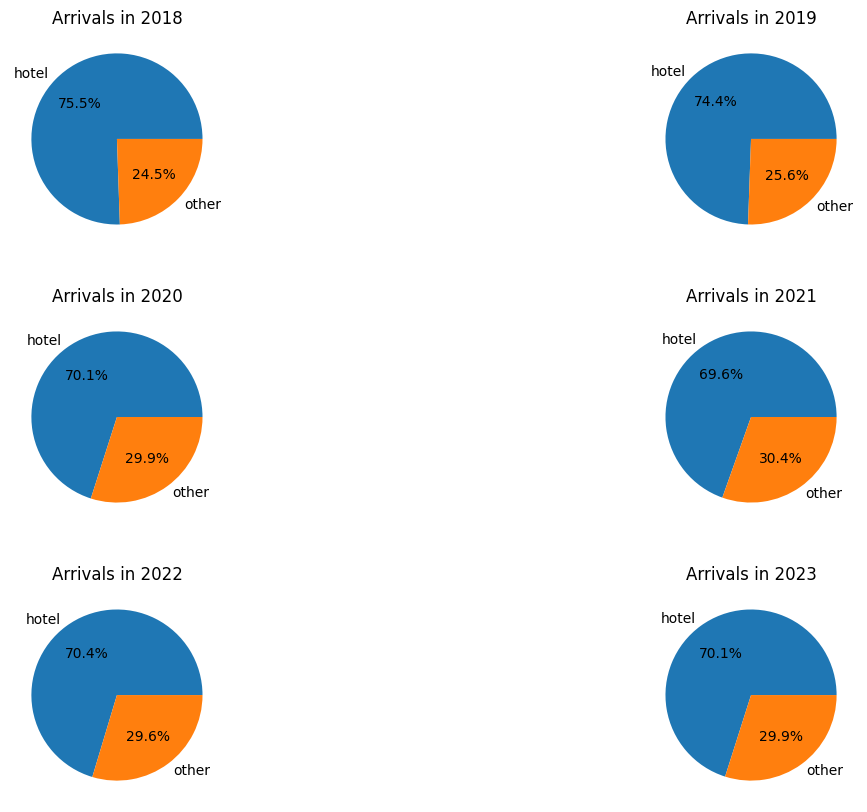

In [113]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  hotel_value = arrivals_hotel.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_hotel.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  ax.pie([hotel_value, other_value], labels=['hotel', 'other'], autopct='%1.1f%%')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

## ARRIVALS PER MONTH

In [117]:
df = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
arrivals_per_month = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) > 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_month[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
months = arrivals.index.to_series().apply(lambda x: x.split('-')[1]).unique()
years = arrivals.index.to_series().apply(lambda x: x.split('-')[0]).unique()

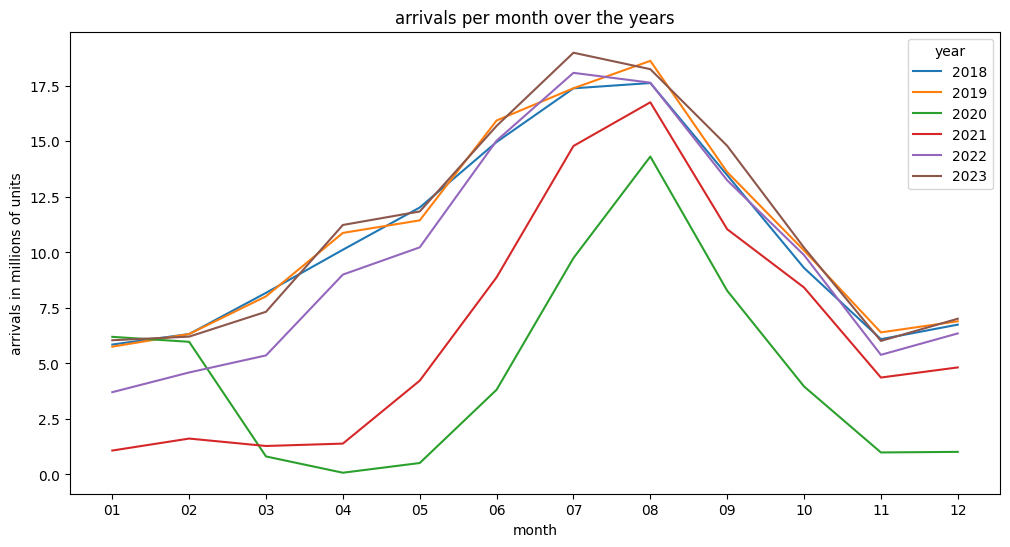

In [181]:
fig, ax = plt.subplots(figsize=(12, 6))

for year in years:
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  ax.plot(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'], label=year)

ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("month")
ax.set_title("arrivals per month over the years")
ax.legend(title="year")

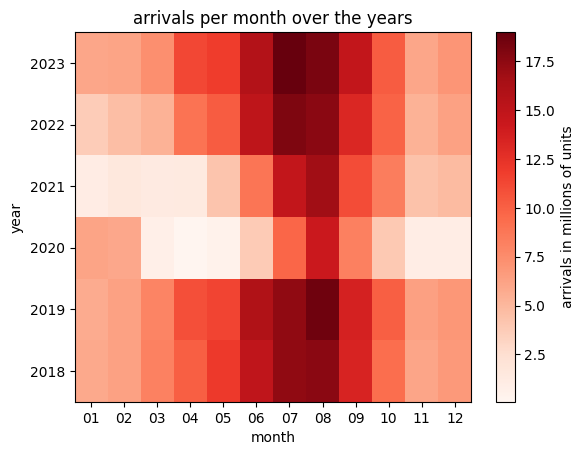

In [182]:
fig, ax = plt.subplots()
matrix = np.array([[arrivals.loc[f'{year}-{month}', 'OBS_VALUE'] if f'{year}-{month}' in arrivals.index else 0 for month in months] for year in years])
c = ax.pcolormesh(months, years, matrix, cmap='Reds')
fig.colorbar(c, ax=ax, label="arrivals in millions of units")
plt.xlabel("month")
plt.ylabel("year")
plt.title("arrivals per month over the years")
plt.show()